<a href="https://colab.research.google.com/github/Kayiwa12/KayiwaPeter.php/blob/main/01_Tensor_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Before Starting, Copy the Colab to your Google Drive Account!!!

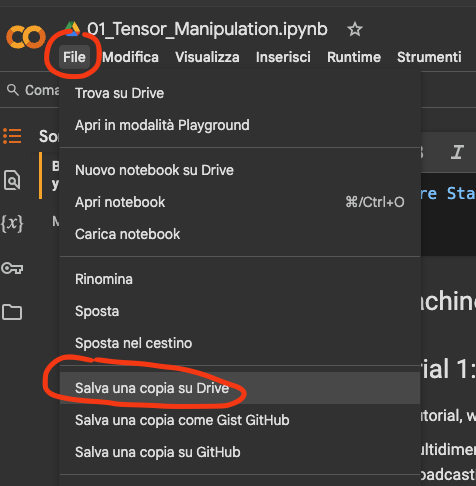

# Machine Learning

# Tutorial 1: Array manipulation

In this tutorial, we will cover:

- Multidimensional arrays (tensors) in NumPy
- Broadcasting
- Einsum

Prerequisites:

- Python

Authors:

- Adapted by Prof. Iacopo Masi

- From ML class of Prof. Emanuele Rodolà and Dr. Antonio Norelli and Dr. Luca Moschella



## Welcome to the Machine Learning lab sessions!
During the lab sessions, you will be guided through one or more Python notebooks that teach you ML tools and provide opportunities to apply what you have learned in class.

We you can do it solo or form small groups of 2 people to read and discuss the notebooks together.

Run the code and play with it! It is very easy to edit the code locally and make small experiments. Try whatever comes to your mind, this is the best way to learn! Python notebooks are designed to be used in this way, that's why we chose them for the ML lab sessions.

There will be some exercises, try to do them by yourself, and when everyone in your group has finished, compare the solutions with each other.

When something is not clear or you have a question, raise your hand and we will come to you.

Some sections in the notebooks are marked with 📖. This is deepening content for further reading outside of class. You may want to go through it at home or during class if you finish early. (Some sections are "more optional" than others, those are marked with more books 📖📖)

Let's start!

## Introduction

Many ML frameworks have emerged for python, including **Scikit-learn**, **PyTorch** (focused on deep learning), and **Jax**.
We will use whichever framework is most appropriate, depending on the topic at hand.

The fundamental data structure of these frameworks is the **multidimensional array** or **tensor**, which is more or less the same everywhere. _A solid understanding of how tensors work is required_ and will definitely come in handy in other areas.

This tutorial will give you solid basics of tensors and operations between tensors.

## Wait, wait, wait... what is this strange web page with code and text cells all around?

It is called Colab, an environment to play with python notebooks directly in your web browser, made by Google. If you never used Colab before, take a look to the following cells, adapted from the official [Colab guide](https://colab.research.google.com/notebooks/welcome.ipynb).



### Getting started with Colab

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Requirements

In [ ]:
! pip install scikit-image

## Numpy

Numpy is a historical library which added support for large, multi-dimensional arrays and matrices to Python.

For example, modern deep learning frameworks (such as PyTorch) have drawn largely from Numpy's API, while at the same time overcoming its limitations such as the absence of GPU support or automatic differentiation.

For example, **Numpy arrays** and **PyTorch tensors** are very similar, and we can seamlessly convert one to the other.

If you have prior knowledge of matrix manipulation in Matlab, we recommend the [numpy for Matlab users page](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) as a useful resource.




In [ ]:
import numpy as np

#### **Tensor instantiation**

A tensor (or multidimensional array) represents an n-dimensional grid of values, **all of the same type**.

In [ ]:
# Basic tensor creation from python lists
np.array([[1, 2, 3], [4, 5, 6]], dtype=np.int32)

In [ ]:
# Some other tensor construction methods
np.zeros((3, 5))

In [ ]:
np.ones((2, 5), dtype=np.float64)

In [ ]:
np.eye(4)

In [ ]:
np.random.rand(2, 3)  # from which distribution are these random
                      # numbers sampled? Check the Numpy documentation

**Pro tip**: Bookmark the [Numpy docs](https://numpy.org/doc/1.26/reference/index.html).

In [ ]:
np.random.randint(0, 100, (3, 4))

In [ ]:
t = np.random.rand(2, 3)
np.ones_like(t)

There are many other functions available to create tensors!

### **EXERCISE 1** 💻
>
> Create a matrix $M \in \mathbb{R}^{3 \times 3}$ that is filled with 2 along the diagonal and 1 elsewhere, that is:
>
> $$
m_{ij} =
\begin{cases}
2 & \text{if } i = j \\
1 & \text{otherwise}
\end{cases}
$$

In [ ]:
# @title 🧑🏿‍💻 Your code here


In [ ]:
# @title 👀 Solution


np.ones((3, 3)) + np.eye(3)

#### 📖  **Tensor properties**

The **type** of a tensor is the type of each element contained in the tensor:

In [ ]:
t = np.random.rand(3, 3)
t.dtype


The **shape** of a tensor is a tuple of integers giving the size of the tensor along each dimension, e.g. for a matrix $M \in \mathbb{R}^{3 \times 5}$:

In [ ]:
t = np.random.rand(3, 5)
t.shape

### **EXERCISE 2** 💻
>
> Given a matrix $X \in \mathbb{R}^{m \times n}$, create another matrix $Y \in \mathbb{R}^{m \times 3}$ filled with ones using $X$ where $m=100$ and $n=42$

In [ ]:
# Exercise variables
X = np.random.rand(100, 42)

# Your solution:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution


np.ones((X.shape[0], 3))

#### 📖 **Tensor rank**

In Numpy and other frameworks such as PyTorch, the **rank of a tensor** denotes the number of dimensions. For example, any matrix is a tensor of rank 2.

⚠ 🔥 Do not confuse this with the rank of a matrix, which has a completely different meaning in linear algebra!

- **rank-0** tensors are just scalars for example a loss in a Neural Net

In [ ]:
t0 = np.array(3.12, dtype=np.double)
t0, t0.shape

In [ ]:
item = t0.item()  # convert the tensor scalar to a python base type
item, type(item)

In [ ]:
# Be careful, a non-scalar tensor cannot be converted with an .item() call
try:
  x = np.ones(3).item()
except ValueError as e:
  print('Error:', e)

- **rank-1** tensors are sequences of numbers. A sequence of length ``n`` has the shape ``(n,)``

In [ ]:
# A rank-1 tensor
t1 = np.array([1, 2, 3])
t1, t1.shape

(array([1, 2, 3]), (3,))

In [ ]:
# A rank-1 tensor with a single scalar
np.array([42]).shape

Frameworks like NumPy and Pytorch are smart: if a tensor is not rank-0 but can be converted to a rank-0 tensor, then the .item() will work.

This operation is called **broadcasting**, we will see it in detail very soon!

In [ ]:
# A rank-1 tensor with a single element can be converted to a rank-0 tensor
np.array([42]).item()

> **NOTE**
>
> Don't be too hopeful about mapping Numpy/Pytorch concepts onto mathematical concepts.
>
> There isn’t a distinction in Numpy/Pytorch between row vectors and column vectors: both are just rank-1 tensors!

- **rank-2** tensors have the shape ``(n, m)``

In [ ]:
t2 = np.array([[1, 2, 3], [4, 5, 6]])
t2, t2.shape

Again, it doesn't make sense to talk about the "rows" and "columns" of rank-2 tensors.

In [ ]:
# element (i,j) of a rank-2 tensor just means the j-th element of the i-th rank-1 tensor
t2[1, 2].item()

In [ ]:
# To mimick the notion of a column vector from linear algebra, we can use a rank-2 tensor
t_col = t1.reshape(-1, 1)
t_col, t_col.shape

(array([[1],
        [2],
        [3]]),
 (3, 1))

In [ ]:
# ...and similarly for row vectors
t_row = t1.reshape(1, -1)
t_row, t_row.shape

🤔 Hold on, what's that `-1` used as a dimensional argument?

When you reshape an array and use `-1` for one of the dimensions, NumPy will automatically infer the size of this dimension based on the array's total size and the specified sizes of the other dimensions!

Therefore, the instruction `t_col = t1.reshape(-1, 1)` is telling NumPy to **use one column, and automatically determine the number of rows.**

In [ ]:
# After reshaping, the standard matrix product will work only if the dimensions match

t = np.ones(10)  # rank-1 tensor

t_row = t.reshape(1, -1)  # rank-2 'row vector'
t_col = t.reshape(-1, 1)  # rank-2 'column vector'

_ = t_row @ np.ones((10, 3))  # does not work with t_col
_ = np.ones((3, 10)) @ t_col  # does not work with t_row

# Notice that the matrix product still does the right thing if we multiply by the rank-1 tensor

_ = t @ np.ones((10, 3))
_ = np.ones((3, 10)) @ t

Yes, we know: using `@` as a matrix product is a bit weird, but this what the developers chose as an operator. You'll get used to it!

- **rank-k** tensors have a shape of $(n_1, \dots, n_k)$

In [ ]:
np.zeros((2, 3, 4)).shape

In [ ]:
np.ones((2, 2, 2, 2)).shape

### **EXERCISE 3** 💻
>
> Build a tensor $X \in \mathbb{R}^{k \times k}$ $k=12$ filled with zeros and the sequence $[0, ..., k-1]$ along the diagonal

In [ ]:
# @title 🧑🏿‍💻 Your code here
k = 12

In [ ]:
# @title 👀 Solution


k = 12
X = np.diag(np.arange(k))
X, X.shape

### **EXERCISE 4** 💻
>
> What is the shape of the following array?
>
> ```python
> np.array(
>     [
>         [[1.0, 1.0, 1.0],
>          [1.0, 1.0, 1.0]],
>
>         [[1.0, 1.0, 1.0],
>          [1.0, 1.0, 1.0]],
>
>         [[1.0, 1.0, 1.0],
>          [1.0, 1.0, 1.0]],
>
>         [[1.0, 1.0, 1.0],
>          [1.0, 1.0, 1.0]],
>     ]
> )
> ```



In [ ]:
# @title 🧑🏿‍💻 Your code here
# Think about it, then confirm your answer by writing code here

### **Changing and adding dimensions**

Numpy provides several functions to manipulate tensor shapes.


#### **Transpose dimension**

In [ ]:
a = np.ones((3, 5))
a[0, -1] = 0  # here -1 denotes the last element, as in common python indexing
a, a.shape

In [ ]:
a.T

In [ ]:
a.transpose(1, 0)  # Swap dimension 1 and 0

In [ ]:
np.einsum('ij -> ji', a)  # transpose using Einstein notation

# Don't fret, we will explain the Einstein notation in detail

#### 📖 Transpose in k-dimensions

The best way to think of the `.transpose()` method in Numpy is as a **permutation** of the dimensions of the tensor. In the example above, `a.transpose(1, 0)` tells Numpy to use the original dimension `1` as the new first dimension, and the original dimension `0` as the new second dimension.

⚠️ This is quite different from the transpose operation PyTorch tensors, where this behavior is instead obtained with the method `.permute()`.

In [ ]:
a = np.ones((2, 3, 6))
a[1, 2, 4] = 42
a, a.shape

In [ ]:
a.transpose(0, 2, 1)  #  the first dimension stays in place, while the other two swap

In [ ]:
np.einsum('ijk->ikj', a)

We all know that shortcuts are handy, but sometimes they make your code less readable.
Most of the time readability is the most important goal to aim for!

What do you think `a.T` will do to our rank-3 tensor? Once you have your hypothesis, test it here:

In [ ]:
a.T

This is confusing even after reading the docs!

Lesson learned: Prefer readable code to short code.

> **NOTE**
>
> We have seen that in NumPy you can specify a complete mapping to transpose and swap any dimensions.
>
> You can do this in two ways: by using the array's method `.transpose()`, or by calling `np.transpose()` **with a different syntax**. Compare:
>
> `a.transpose(2, 0, 1)`
>
> `np.transpose(a, axes=(2, 0, 1))`
>
> The two instructions above give exactly the same results!

⚠️ Be careful: most operations on Numpy arrays **are not in-place**!

This means that said operations will _not_ modify the array. If you want to store the result of an operation, you'll have to explicitly assign it.

In [ ]:
a = np.arange(10).reshape(2, 5)
a

In [ ]:
a.transpose(1, 0)  # does not modify a!
a

In [ ]:
a = a.transpose(1, 0)  # a is reassigned
a

In [ ]:
# The einsum is cross platform. It works with consistent semantics
# pretty much everywhere: PyTorch, NumPy, TensorFlow, Jax, ...
# We will see the power of einsum in the next lab
np.einsum('ij -> ji', a)

#### **Reshape**

Above we have seen a few calls to the `reshape()` method, leaving it to your intuition. Let's delve a bit deeper.

**Reshaping** a tensor into different dimensions is an important feature that greatly aids our implementation tasks! Keep these two points in mind when reshaping:

- We need to make sure to **preserve the same number of elements**.
- `-1` in one of the dimensions means **"figure it out"**.


❌❌❌ Pay attention that **transposing and reshaping are two fundamentally different operations**:

In [ ]:
a = np.arange(12).reshape(3, 4)
a

In [ ]:
# The classical transpose
a.T

In [ ]:
# Reshape into the transpose shape
a.reshape(4, 3)

#### 📖 **What is `reshape` really doing?**



Think of the `reshape` operation as unrolling the tensor **row-wise**, to obtain a rank-1 tensor *(matlab users: matlab unrolls **column-wise**, pay attention when converting code!)*. Then it stores the values in this tensor following the specified dimensions.

```python
array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
```
$-$ unrolling $ \to $

```python
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```

Then, reading the target shape from right to left, organize the values into the dimensions:

- e.g. reshape into `[4, 3]`:

```python
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```

$-$ organize in groups of $3$ $ \to $

```python
array([[0,  1,  2],  [3,  4,  5],  [6,  7,  8],  [9, 10, 11]])
```

$-$ organize in groups of $4$ $ \to $

```python
array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

# same shape of corresponding transpose, but the values are stored differently!
```

- e.g. reshape into `[2, 2, 3]`:

```python
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```

$-$ organize in groups of $3$ $ \to $

```python
array([[0,  1,  2],  [3,  4,  5],  [6,  7,  8],  [9, 10, 11]])
```

$-$ organize in groups of $2$ $ \to $

```python
array([[[0,  1,  2],  [3,  4,  5]],  [[6,  7,  8],  [9, 10, 11]]])
```

$-$ organize in groups of $2$ $ \to $

```python
array([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])
```

In [ ]:
a = np.arange(12)
a, a.shape

In [ ]:
a.reshape(6, 2)

In [ ]:
a.reshape(2, 6)

In [ ]:
a.reshape(2, 2, 3)

In [ ]:
try:
  a.reshape(5, -1)
except ValueError as e:
  print('Error:', e)

In [ ]:
a.reshape(1, -1)

In [ ]:
a.reshape(-1, 1)

### **EXERCISE 5** 💻

What does

```python
a.reshape(-1)
```

perform?

Answer it before trying it out

In [ ]:
a.reshape(-1)

> **NOTE**
>
> Sometimes, we want to add or remove dimensions of size `1` to an existing array. For example, you have a 1-dimensional array constructed from a list, and you want to make it into a 2-dimensional array with only one row.
>
> You can do this by using `np.newaxis`, as follows.

In [ ]:
a

In [ ]:
a.shape

In [ ]:
a[np.newaxis, ...].shape  # adds a new dimension at the front

In [ ]:
a[..., np.newaxis].shape  # adds a new dimension at the end

In [ ]:
b = np.ones((3, 4, 2))
b.shape
b[:, :, np.newaxis, :].shape  # adds a new dimension inbetween

> **NOTE**
>
> Often the reshape does not require a physical copy of the data, but just a logical
> reorganization.
>
> If you are curious about the NumPy/PyTorch tensor internals, a good starting point to learn about *strides* is this [SO answer](https://stackoverflow.com/questions/53097952/how-to-understand-numpy-strides-for-layman).
> tldr: often you can reshape tensors by changing only its strides and shape. The strides  are the byte-separation between consecutive items for each dimension.

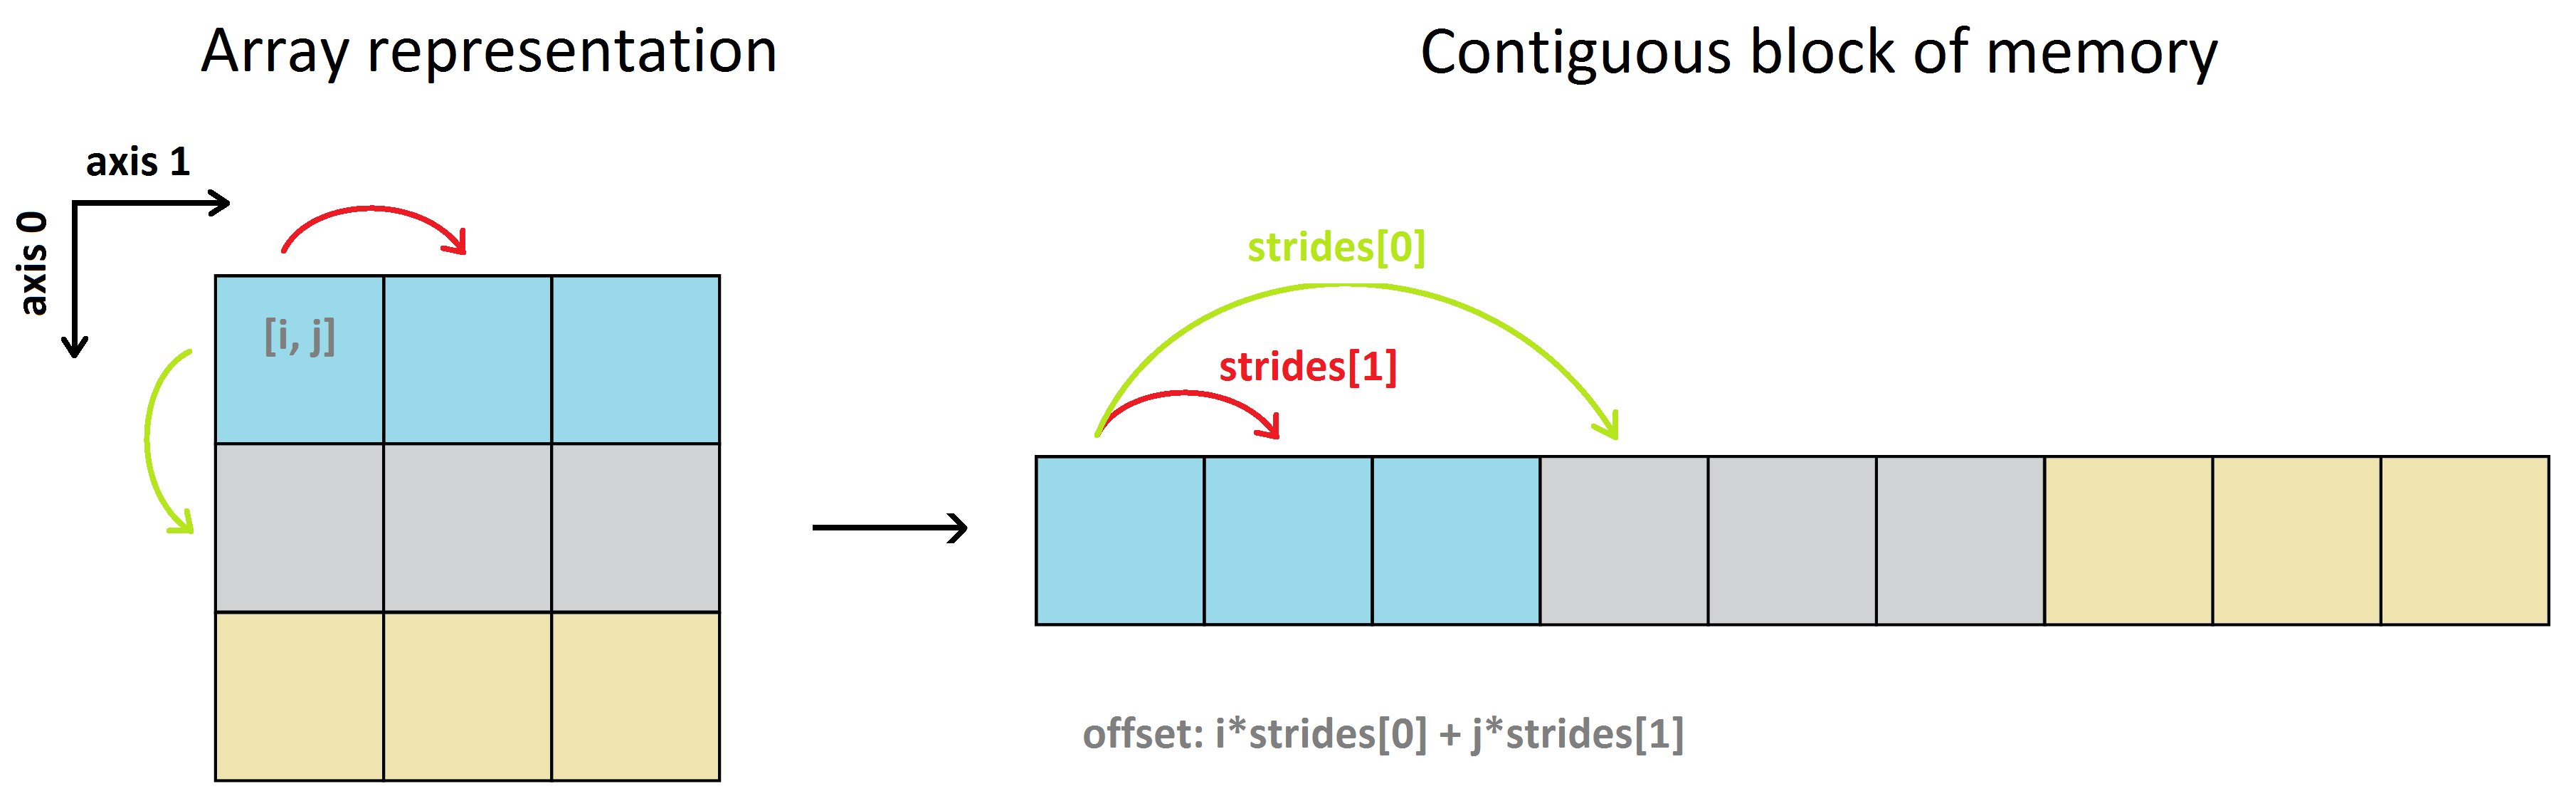

To map the indices i,j,k,... of a multidimensional array to the positions in the data buffer (the offset, in bytes), NumPy uses the notion of strides. **Strides are the number of bytes to jump-over in the memory in order to get from one item to the next item along each direction/dimension of the array. In other words, it's the byte-separation between consecutive items for each dimension.**

While `np.newaxis` adds dimensions, it is perhaps even more common to _remove_ dimensions from a Numpy array. Use `.squeeze()` for this operation.

In [ ]:
a = np.array([[[[[1, 2, 3]]]]])
print(f"{a} has shape {a.shape}")
a = a.squeeze()
print(f"{a} has shape {a.shape}")

### **EXERCISE 6** 💻
>
> Given a sequence of increasing numbers from `0` to `9`, defined as:
>
> ```python
> a = np.arange(10)
> ```
>
> Use only the `reshape` and `transpose` functions to obtain the following array from `a`:
>
> ```python
> array([0, 2, 4, 6, 8, 1, 3, 5, 7, 9])
> ```

In [ ]:
# @title 🧑🏿‍💻 Your code here

a = np.arange(10)
print(a)

In [ ]:
# @title 👀 Solution
a.reshape(5, 2).transpose(1, 0).reshape(1, -1).squeeze()

#### **Concatenation**

NumPy provides many functions to manipulate tensors.
Two of the most common functions are:

- `np.stack`: Adds a **new** dimension, and concatenates the given tensors along that dimension.
- `np.concatenate`: Concatenates the given tensors along one of the **existing** dimensions.

In [ ]:
a = np.arange(12).reshape(3, 4)
b = np.arange(12).reshape(3, 4) + 100
print(a)
print(b)
print(a.shape)

In [ ]:
# stacks along a new dimension
out = np.stack((a, b))
print(out)
print(out.shape)

In [ ]:
# you can also specify the axis along which the stacking will take place.
# a new dimension is always added!
# axis=0 corresponds to stacking along the new dimension.
out = np.stack((a, b), axis=1)
print(out)
print(out.shape)

In [ ]:
# concatenate along an existing dimension, just specify which.
out = np.concatenate((a, b), axis=0)
print(out)
print(out.shape)

In [ ]:
out = np.concatenate((a, b), axis=1)
print(out)
print(out.shape)

### **EXERCISE 7** 💻
>
> Given a tensor $X \in \mathbb{R}^{3 \times 1920 \times 5 \times 1080}$ reorganize it in order to obtain a tensor $Y \in \mathbb{R}^{5 \times 1920 \times 1080 \times 3}$
>
> Think of $X$ as a tensor that represents $5$ RGB images of size $1080\times 1920$. Your goal is to reorganize this tensor in a sensible (and usable) way.


In [ ]:
a = np.random.rand(3, 1920, 5, 1080)
a.shape

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution

a.transpose(2, 1, 3, 0).shape

### **Tensor indexing**

NumPy offers several ways to index tensors.


#### **Standard indexing**

As a standard Python list, NumPy arrays support the python indexing conventions:

In [ ]:
a = np.arange(10)
a

In [ ]:
print(a[0])  # first element
print(a[5])  # sixth element

In [ ]:
print(a[-1])  # last element
print(a[-2])  # second last element

#### **Multidimensional indexing**

Since tensors may be multidimensional, you can specify **one index for each dimension**:

In [ ]:
a = np.arange(10).reshape(2, 5)
a

In [ ]:
a[1, 3]

In [ ]:
a[0]

In [ ]:
a[1]

In [ ]:
a[0, -1]

### **EXERCISE 7** 💻
>
> What element is at position `a[1, -1]`?

#### **Slicing**

Numpy arrays can be easily sliced using the slice notation:

```python
a[start:stop]  # items from start to stop-1 (i.e. the last element is excluded)
a[start:]      # items from start through the rest of the array
a[:stop]       # items from the beginning through stop-1
a[:]           # a shallow copy of the whole array
```

There is also an optional step value, which can be used with any of the above:

```python
a[start:stop:step] # from start to at most stop-1, by step
```

In [ ]:
# Sum with scalar acts element-wise
a = np.arange(10) + 10
a

In [ ]:
# Take the elements in positions 5..6
a[5:7]

In [ ]:
# Take the last 5 elements
a[-5:]

In [ ]:
# Select every element having an even index
a[::2]

With multidimensional arrays we can perform **multidimensional slicing**:

In [ ]:
a = np.arange(10).reshape(2, 5)
a

In [ ]:
# Take the second column
a[:, 1]

In [ ]:
# Take the last column
a[:, -1]

In [ ]:
# Take a slice from the last row
a[-1, -3:]

You can **assign** to sliced tensors, therefore *modifying the original tensor*.

This means that sliced tensors are **shallow copies**: the resulting tensors **share the underlying data** with the original tensor.

In [ ]:
a = np.arange(10).reshape(2, 5)
a

In [ ]:
b = a[0:2, 1:3]
b

In [ ]:
b[-1, :] = -999
b

In [ ]:
# The original tensor has been modified
a

In [ ]:
a[-1, -1] = -1
a

> **NOTE**
>
> Indexing with integers **yields lower rank tensors**
>
> Integer indexing simply means we don't use slices (:) or boolean masks for indexing.

In [ ]:
a = np.arange(12).reshape(3, 4)
a, a.shape

In [ ]:
# Rank-1 view of the second row of a
row_r1 = a[1, :]
row_r1, row_r1.shape  # notice the size of the resulting tensor, which is now lower than the original tensor

In [ ]:
# Rank-2 view of the second row of a
row_r2 = a[1:2, :]
row_r2, row_r2.shape

In [ ]:
# Rank-2 view of the second row of a
row_r3 = a[[1], :]
row_r3, row_r3.shape

In [ ]:
# Same with the columns
print(a[:, 1])
print(a[:, [1]])

#### 📖📖 **Slice Object**

The **slice syntax** is just a shortand.

In Python everything is an object, even a ``slice``.
It is possible to explicitly create a ``Slice`` object and reuse it to **index multiple tensors in the same way**:





In [ ]:
# The signature follows the same pattern as above: (begin, end, step)

s1 = slice(3)  # equivalent to the slice [:3]
s1

In [ ]:
type(s1)  # Slice is a python built-in type!

In [ ]:
out = a[s1]  # equivalent to a[:3]

print(f"{a} has shape{a.shape}")
print(f"{out} has shape{out.shape}")

In [ ]:
mystring = 'this is just a string'
mystring[s1]

In [ ]:
s2 = slice(None, None, -1)  # equivalent to [::-1]
mystring[s2]

In [ ]:
a[s2]  # NumPy also supports negative steps

#### 📖 **Integer array indexing**

When we use slices (:), the resulting tensor view will always be a subarray of the original tensor.

In contrast, if we index with integers only, we can construct arbitrary tensors using the data from another tensor.

In [ ]:
a = np.arange(1, 7).reshape(3, 2)
a, a.shape

In [ ]:
# Example of integer array indexing
# The returned array will have shape (3,)
b = a[[0, 1, 2], [0, 1, 0]]
b, b.shape

In [ ]:
# The above is equivalent to:
v1, v2, v3 = a[0, 0], a[1, 1], a[2, 0]
b = np.array([v1, v2, v3])
b, b.shape

In [ ]:
# You can re-use the same element of the source tensor multiple times!
print(a[[0, 0], [1, 1]])
print(np.array([a[0, 1], a[0, 1]]))

In [ ]:
# You can use another tensor to perform the indexing,
# as long as they have dtype=np.int64 (synonym for np.long)
i = np.ones(3, dtype=np.int64)
i

In [ ]:
j = np.array([0, 1, 0])
j

In [ ]:
out = a[i, j]

print(a)
print(out)

### **EXERCISE 8** 💻
>
> Using a single assignment, change the elements of a tensor $X \in \mathbb{R}^{4 \times 3}$ as follows:
>
> `X[0,2] = -1`
>
> `X[1,1] = 0`
>
> `X[2,0] = 1`
>
> `X[3,1] = 2`



In [ ]:
# @title 🧑🏿‍💻 Your code here
# Mutate one element from each row of a matrix
a = np.arange(12).reshape(4, 3)
a

In [ ]:
# @title 👀 Solution


a[[0, 1, 2, 3], [2, 1, 0, 1]] = np.array([-1, 0, 1, 2])
a

> ❌❌❌ **NOTE**
>
> **Slice indexing vs Array indexing**
>
> Be careful, since slice indexing and array indexing are different operations!

In [ ]:
a = np.arange(16).reshape(4, 4)
a

In [ ]:
a[0:3, 0:3]

In [ ]:
a[[0, 1, 2], [0, 1, 2]]

In [ ]:
a[np.arange(0,3), np.arange(0,3)]

In [ ]:
a[0:5:2, 0:5:2]

In [ ]:
# With *slice indexing* you return a sub-tensor.

#### **Boolean array indexing**

This type of indexing is used to select the elements of a tensor that satisfy some condition (similar to MATLAB's logical indexing):

In [ ]:
a = np.arange(6).reshape(3, 2)
a

In [ ]:
bool_idx = (a > 2)
bool_idx

In [ ]:
a[bool_idx]  # remember that NumPy and PyTorch unroll row-wise and not column-wise like Matlab

If you want to know more about indexing in PyTorch and Numpy read the [docs](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing)

##### 📖📖 **Graph use case**

Suppose you have a weighted adjacency matrix for a directed graph. We want to obtain a list of edges with weight greater than 0.5.

How can we do that?





In [ ]:
# Let's define a random adjacency
a = np.random.randint(0, 2, size=(5, 5)).astype(bool)
adj_matrix = ((a + a.T) > 0.5) * np.random.rand(*a.shape)
adj_matrix

# Note on unpacking:
#   np.random.rand(*a.shape)
# is equivalent to
#   np.random.rand(a.shape[0], a.shape[1])

In [ ]:
# The list of edges
(adj_matrix > 0.5).nonzero()

In [ ]:
# The asssociated weights for each edge
adj_matrix[adj_matrix > 0.5]

### **EXERCISE 9** 💻

> **EXERCISE**
>
> Build a 3D tensor in $X \in \mathbb{R}^{3 \times 3 \times 3}$ that has ones along the 3D-diagonal and zeros elsewhere, i.e. a 3D identity.

In [ ]:
# @title 🧑🏿‍💻 Your code here
# X = ?

In [ ]:
# @title 👀 Solution


X = np.zeros((3, 3, 3))
X[np.arange(3), np.arange(3), np.arange(3)] = 1
X

### **EXERCISE 10** 💻
>
> You are given a 3D tensor $X \in \mathbb{R}^{w \times h \times 3}$ representing a $w \times h$ image with `(r, g, b)` color channels. Assume that colors take values in $[0, 1]$.
>
> Color the image $X$ completely by red, i.e. `(1, 0, 0)` in the `(r, g, b)` format.

In [ ]:
# @title 🧑🏿‍💻 Your code here
# Create and visualize a black image
x = np.zeros((100, 200, 3))

%matplotlib inline
import matplotlib.pyplot as plt
img = plt.imshow(x)

In [ ]:
# Write here your solution

In [ ]:
# @title 👀 Solution

x[:, :, 0] = 1
img = plt.imshow(x)

# alternative solution using broadcasting -- we'll explain broadcasting in a bit!
# plt.imshow(x + (1, 0, 0))

### **EXERCISE 11** 💻
>
> You are given the GitHub logo $X \in \mathbb{R}^{560 \times 560}$.  Assume the logo is in gray scale, with the color $c \in [0, 1]$ (remember 0 $\to$ black).
>
> 1. Change the black-ish color into light gray: $0.8$.
> 2. Then draw a diagonal and anti-diagonal black line (i.e. an X) on the new image, to mark that the new logo is wrong.

In [ ]:
from skimage import io

image = io.imread('https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png', as_gray=True)
_ = plt.imshow(image, cmap='gray', vmin=0, vmax=1)

In [ ]:
# @title 🧑🏿‍💻 Your code here
# Change the black into light-gray
X = image.copy()
# # ?

_ = plt.imshow(X, cmap='gray', vmin=0, vmax=1)

In [ ]:
# @title 🧑🏿‍💻 Your code here
# # Mark the new image as wrong with a big black X
# # ?

_ = plt.imshow(X, cmap='gray', vmin=0, vmax=1)

In [ ]:
# @title 👀 Solution


X[X < 1] = 0.8
X[np.arange(X.shape[0]), np.arange(X.shape[1])] = 0
X[np.arange(X.shape[0] - 1, -1, -1), np.arange(X.shape[1])] = 0

_ = plt.imshow(X, cmap='gray', vmin=0, vmax=1)

It is now a good moment for a break! ☕🍩

We'll move on to some more important operations in NumPy with the remainder of this notebook. We know it's a bit exhausting, but remember: this notebook will unlock important skills that you'll probably use throughout your work!

### **Tensor operations**



In [ ]:
t = np.random.rand(3, 3)
t

Functions that operate on tensors are often accessible in different ways:

- From the **`numpy` module**...:

In [ ]:
np.add(t, t)  # does not operate in-place!

- ...or by means of overloaded **operators**:

In [ ]:
t += t

These functions are equivalent, they are *aliases* of the same method.
Personal preference, code consistency, and readability should guide your decision of which one to use.

> e.g. `np.add(...)` may be too verbose, but in some cases it may be preferable since it makes explicit to the code-reader that you are dealing with tensors. Nevertheless, if you are using [types](https://docs.python.org/3/library/typing.html) -- and you should be using types -- it will be rarely necessary.

#### **Basic operations and broadcasting**

Basic mathematical operations $(+, -, *, /, **)$ are applied **element-wise**: for example, if `x` and `y` are two tensors, the product `x*y` is a tensor with the same size, and its values are the element-wise products of the two tensors. In mathematics, this is also called a Hadamard product.

**Broadcasting** is another powerful mechanism that allows NumPy to perform operations on tensors of different shapes. The most basic example is summing a scalar (a rank-0 tensor) to a matrix (a rank-2 tensor).

In [ ]:
x = np.array([[1, 2], [3, 4]], dtype=np.float64)
y = np.array([[5, 6], [7, 8]], dtype=np.float64)

print(x + y)  # element-wise sum
print(x + 4.2)  # broadcasting

In [ ]:
# other examples
print(x * y - 5)
print((x - y) / y)  # element-wise division!

Broadcasting is quite powerful! When you perform an operation between two tensors with different shape, NumPy automatically "broadcasts" the smaller tensor across the larger tensor so that they have compatible shapes.

In the example below, the sequence `v` is replicated (_without actually copying data!_) along the missing dimension so that it fits the shape of matrix `m`:

In [ ]:
m = np.arange(12).reshape(4, 3)
v = np.array([100, 0, 200])
n = m + v
m, v, n

In this other example `m` and `u` are both rank-2, but the smaller one (`u`) is expanded along the dimension where it has size 1 to fit `m`:

In [ ]:
m = np.arange(12).reshape(4, 3)
u = np.array([0, 10, 0, 20]).reshape(4,1)
n = m + u
m, u, n

In the following example, both tensors are expanded along their size-1 dimensions, so that the sum makes sense:

In [ ]:
w = u + v
u, v, w

Mastering broadcasting is hard!

However, it is very convenient as it allows writing **vectorized** code, i.e., code that avoids explicit python loops which can not be efficiently parallelized.

Technically, broadcasting takes advantage of the underlying C implementation of Numpy. Here's a take-home illustration for your convenience:

![broadcasting](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

### **EXERCISE 12** 💻
>
> Given two vectors $x \in \mathbb{R}^n$ and $y \in \mathbb{R}^m$, compute the differences between all possible pairs of their elements, and organize these differences in a matrix $Z \in \mathbb{R}^{n \times m}$:
> $$ z_{ij} = x_i - y_j $$

In [ ]:
x = np.array([1, 2, 3])
y = np.array([4, 5])

# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution


out = x[..., np.newaxis] - y

# equivalent to:
# x.reshape([-1, 1]) - y

# equivalent to:
# x[:, None] - y

# equivalent to:
# x[:, None] - y[None, :]

x, y, out

> **Using `None` to add new dimensions**
>
> In NumPy, a convenient syntax for adding new dimensions and reshaping (which you can see adopted in the solution above) makes use of the `None` object in indexing.
>
> Here's an example to help you remember the syntax:
>
> `x[None, None, :, None]`
>
> The above simply states: "put `x` in the third dimension of a new tensor, adding two dimensions at the beginning and one at the end".
>
> This means, for instance, that if `x` is a list then `x[:, None]` will be a rank-2 tensor with `x` along the first dimension.

Try it out!

In [ ]:
x = np.arange(5)
x[None, None, :, None]

#### 📖 **Broadcasting, let's take a peek under the hood**

To recap: if a NumPy operation supports broadcast, then **its tensor arguments can be implicitly expanded to be of equal sizes** (without making copies of the data).

###### **Broadcastable tensors**

Two tensors are "broadcastable" if:
- Each tensor has at least one dimension
- When iterating over the dimension sizes, starting at the trailing dimension, the dimension **sizes** must either **be equal**, **one of them is 1**, or **one of them does not exist**.


###### **Broadcasting rules**

Broadcasting two tensors together follows these rules:

1. If the input tensors have different ranks, **singleton dimensions are prepended to the shape** of the smaller one until it has the same rank as the other
2. The size in each dimension of the **output shape** is the maximum size in that dimension between the two tensors
3. An input can be used in the computation if its size in a particular **dimension either matches** the output size in that dimension, **or is a singleton dimension**
4. If an input has a dimension size of 1 in its shape, the **first data entry in that dimension will be used for all calculations** along that dimension.

**Example**:

- `m` has shape `[4, 3]`
- `v` has shape `[3,]`.


In [ ]:
m, v

In [ ]:
n = m + v
n


Following the Broadcasting logic, this is what happened:

- `v` has less dims than `m` so a dimension of `1` is **prepended** $\to$ `v` is now `[1, 3]`.
- Output shape will be `[max(1, 4), max(3, 3)] = [4, 3]`.
- `dim 1` of `v` matches exactly `3`; `dim 0` is `1`, so we can use the first data entry in that dimension (i.e. the whole `row 0` of `v`) each time any row is accessed. This is effectively like converting `v` from `[1, 3]` to `[4, 3]` by stacking the repeated row four times.


For more on broadcasting, see the [documentation](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

Functions that support broadcasting are known as universal functions (i.e. ufuncs). For Numpy you can find the list of all universal functions in the [documentation](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

### **EXERCISE 13** 💻
>
> Given a tensor $Y \in \mathbb{R}^{n \times m}$ consider the index pair in the center of $Y$ $(a,b)=(n/2,m/2)$.
Now for each **index pair $(i,j)$** of $Y$ compute its $L_p$ distance to $(a,b)$, and store the resulting distance value in the corresponding cell of $Y$.
>
> In brief, compute:
> $$ y_{ij} = d_{L_p}\left( (i,j), (a,b) \right) \text{ for all }  i,j$$
>
> and visualize the resulting $Y$.
>
> Try different values of $p>0$ to see what happens.
>
> ---
>
> The [$L_p$ distance](https://en.wikipedia.org/wiki/Lp_space#The_p-norm_in_finite_dimensions) between two points $x$ and $y$ can be computed as: $d_{L_p}(x, y)=\left( \sum_{i=1}^n|x_i - y_i|^p\right)^{1/p}$
>
> Example: The $L_1$ distance between $(i,j) = (3, 5)$ and $(a,b) = (14, 20)$ is:
> $$ y_{3,5} = d_{L_1}( (3, 5), (14, 20) ) = |3 - 14| + |5 - 20| $$

In [ ]:
import plotly.express as px

Y = np.zeros((300, 300))
a = int(Y.shape[0]/2)
b = int(Y.shape[1]/2)

NameError: name 'np' is not defined

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution

rows = np.arange(x.shape[0])
cols = np.arange(x.shape[1])

# Manual computation of L1
y = (np.abs(rows - a)[:, None] + np.abs(cols - b)[None, :])
px.imshow(y).show()

In [ ]:
# @title 👀 Solution


# Parametric computation of Lp
p = 8
y = ((np.abs(rows - a ) ** p )[:, None] +
     (np.abs(cols - b) ** p)[None, :]) ** (1/p)
px.imshow(y).show()

Try Solution 2 with `p=10`. What happens, and why?

In [ ]:
# @title 👀 Solution


# This works even with p=10. Why?
p = 10
y = ((np.abs(rows.astype(np.float64) - a ) ** p )[:, None] +
     (np.abs(cols.astype(np.float64) - b) ** p)[None, :]) ** (1/p)
px.imshow(y).show()

# -> Write your own explanation here
p = 10
print(np.array(10, dtype=np.int32) ** p)
print(np.array(10, dtype=np.double) ** p)

#### **Non-elementwise operations**


NumPy provides many useful functions to perform computations on tensors:

In [ ]:
x = np.array([[1, 2, 3], [3, 4, 5]], dtype=np.float32)
x

In [ ]:
# Sum up all the elements
np.sum(x)

In [ ]:
# Compute the mean of each column
np.mean(x, axis=0)

> **REMEMBER!**
>
> In order to avoid confusion with the `axis` parameter, you can think of it as an **index over the list returned by `np.shape`**. The operation is performed by iterating over that dimension.
>
> Example above: since our tensor `x` has shape `[2, 3]`, the dimension `axis=0` operates along the `2`.
>
><img src="https://qph.fs.quoracdn.net/main-qimg-30be20ab9458b5865b526d287b4fef9a" width="500" >

In [ ]:
x

In [ ]:
# Compute the product of each row
np.prod(x, axis=1)

In [ ]:
# Max along the rows (i.e. max value in each column)
values = np.max(x, axis=0)
values

In [ ]:
# Max along the columns (i.e. max value in each row)
values = np.max(x, axis=1)
values

##### 📖 **Axis parameter, let's take a peek under the hood**


Let's see what the `axis` parameter exactly does:

In [ ]:
axis = 2

a = np.arange(2*3*4).reshape(2, 3, 4)
out = a.sum(axis=axis)
out

array([[ 6, 22, 38],
       [54, 70, 86]])

In [ ]:
# It is summing over the `dim` dimension, i.e.:
a.shape

(2, 3, 4)

In [ ]:
# The `axis` dimension has 4 elements
a.shape[axis]

4

In [ ]:
# The dimension axis collapses, the output tensor will have shape:
new_shape = a.shape[:axis] + a.shape[axis + 1:]
new_shape

(2, 3)

In [ ]:
# Explicitly compute the sum over dim
out = np.zeros(new_shape)

# iterate over all the rows
for r in range(a.shape[0]):
  # iterate over all the columns in the r-th row
  for c in range(a.shape[1]):
    # iterate finally over the summing dimensions
    for i in range(a.shape[axis]): # <- sum over 'dim'
      out[r, c] += a[r, c, i]
out

# **DO NOT** use for loops in your code

### **EXERCISE 14** 💻
>
> Given a matrix $X \in R^{k \times k}$:
> - Compute the mean of the values along its diagonal.
>
> Perform this computation in at least two different ways, then check that the results are the same.

In [ ]:
x = np.random.rand(4, 4)
x

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution


a = np.mean(x[np.arange(x.shape[0]), np.arange(x.shape[1])])
b = np.sum(np.eye(x.shape[0]) * x) / x.shape[0]
c = np.trace(x) / x.shape[0]
d = np.mean(np.diag(x))

print(np.allclose(a, b) and np.allclose(a, c) and np.allclose(a, d))
print(a)

### **EXERCISE 15** 💻
>
> Given a binary non-symmetric matrix $X \in \{0, 1\}^{n\times n}$, build the symmetric matrix $Y \in \{0, 1\}^{n \times n}$ defined as:
> $$
y_{ij} =
\begin{cases}
1 & \text{if } x_{ij} = 1 \\
1 & \text{if } x_{ji} = 1 \\
0 & \text{otherwise}
\end{cases}
$$
>
> *Hint*: search for `clip` in the [docs](https://numpy.org/doc/stable/reference/index.html)

In [ ]:
x = np.random.randint(0, 2, (5, 5))  # Non-symmetric matrix
x

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution


(x + x.transpose(1, 0)).clip(max=1)

#### **Tensor contractions**

##### **Matrix multiplication**

Given $X \in R^{n \times d}$ and $Y \in R^{d \times v}$, their matrix multiplication $Z \in R^{n \times v}$ is defined as:

$$ \sum_{k=0}^{d} x_{ik} y_{kj} = z_{ij} $$


In [ ]:
x = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([[1, 2], [2, 1]])
x, y

In [ ]:
# as we will see, matmul's functionality is not limited to matrix-matrix multiplication
np.matmul(x, y)

In [ ]:
x @ y  # Operator overload for matmul

In [ ]:
np.einsum('ik, kj -> ij', x, y)  # Einsum notation!

# It summed up dimension labeled with the index `k`

##### **Dot product**
Also known as scalar product or inner product.
Given $x \in \mathbb{R}^k$ and $y \in \mathbb{R}^k$, the dot product $z \in \mathbb{R}$ is defined as:

$$ \sum_{i=0}^{k} x_i y_i = z $$

In [ ]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
x, y

In [ ]:
# We want to perform:
(1 * 4) + (2 * 5) + (3 * 6)

In [ ]:
np.dot(x, y)

In [ ]:
x.dot(y) # as a method

In [ ]:
x @ y  # operator overloading matmul

In [ ]:
np.einsum('i, i ->', x, y)  # Einstein notation!

# Read it as:
# - iterate with i along x
# - iterate with i along y
# - compute the product at each iteration
# - sum the products and return a scalar (-> means return a scalar)

# More in general, Einstein notation:
# Multiply point-wise repeated indices in the input
# Sum up along the indices that `do not` appear in the output

# More on this below!

##### 📖 **Broadcast matrix multiplication**

Given a matrix $Y \in \mathbb{R}^{m \times p}$ and $b$ matrices of size $n \times m$ organized in a 3D tensor $X \in \mathbb{R}^{b \times n \times m}$, we want to multiply together each matrix $X_{i,:,:}$ with $Y$, obtaining a tensor $Z \in R^{b \times n \times p}$ defined as:

$$ z_{bij} = \sum_{k=0}^m x_{bik} y_{kj} $$


In [ ]:
x = np.array([[[1, 2], [3, 4], [5, 6]], [[1, 2], [3, 4], [5, 6]]])
y = np.array([[1, 2], [2, 1]])
x, y

In [ ]:
np.matmul(x, y)  # always uses the last two dimensions

In [ ]:
x @ y   # still using the last two dimensions since @ overloads matmul

### **EXERCISE 16** 💻
>
> Use the einsum notation to compute the equivalent broadcast matrix multiplication!

### **Einsum notation**

Einstein notation is a way to express complex operations on tensors.

- It is **concise but expressive enough** to perform almost every operation you will need in building your neural networks, allowing you to think of the only thing that matters... **dimensions!**
- You will **not need to check your dimensions** after an einsum operation, since the dimensions themselves are *defining* the tensor operation.
- You will **not need to shape-comment** your tensors. Those comments do not work: they are bound to get outdated.
-  You will not need to explicitly code **intermediate operations** such as reshaping, transposing and intermediate tensors.
- It is **not library-specific**, being avaiable in ``numpy``, ``pytorch``, ``tensorflow`` and ``jax`` with the same signature. So you do not need to remember the functions signature in all the frameworks.
- It can sometimes be compiled to high-performing code (e.g. [Tensor Comprehensions](https://pytorch.org/blog/tensor-comprehensions/))

Check [this blog post by Olexa Bilaniuk](https://obilaniu6266h16.wordpress.com/2016/02/04/einstein-summation-in-numpy/) to take a peek under the hood of einsum and [this one by Tim Rocktäschel](https://rockt.github.io/2018/04/30/einsum) for several examples.

Its formal behavior is well described in the [Numpy documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.einsum.html).
However, it is very intuitive and better explained through examples.

![alt text](https://obilaniu6266h16.files.wordpress.com/2016/02/einsum-fmtstring.png?w=676)

> *Historical note (taken from O.Bilaniuk's post)*
>
> Einstein had no part in the development of this notation. He merely popularized it, by expressing his entire theory of General Relativity in it. In a letter to [Tullio Levi-Civita](https://en.wikipedia.org/wiki/Tullio_Levi-Civita), co-developer alongside [Gregorio Ricci-Curbastro](https://en.wikipedia.org/wiki/Gregorio_Ricci-Curbastro) of Ricci calculus (of which this summation notation was only a part), Einstein wrote:
>
> " *I admire the elegance of your method of computation; it must be nice to ride through these fields upon the horse of true mathematics while the like of us have to make our way laboriously on foot.* "

In [ ]:
a = np.arange(6).reshape(2, 3)  # will use this in the examples below

###### **Matrix transpose**

$$ B_{ji} = A_{ij} $$

In [ ]:
# The characters are indices along each dimension
b = np.einsum('ij -> ji', a)
a, b

###### **Sum**

$$ b = \sum_i \sum_j A_{ij} := A_{ij} $$


In [ ]:
# Indices that do not appear in the output tensor are summed up
b = np.einsum('ij -> ', a)
a, b

###### **Column sum**

$$ b_j = \sum_i A_{ij} := A_{ij} $$

In [ ]:
# Indices that do not appear in the output tensor are summed up,
# ...even if some other index appears
b = np.einsum('ij -> j', a)
a, b

### **EXERCISE 17** 💻
>
> Given a binary tensor $X \in \{0, 1\}^{n \times m}$ return a tensor $y \in \mathbb{R}^{n}$ that has in the $i$-th position the **number of ones** in the $i$-th row of $X$.
>
>Give a solution using `einsum`, and a solution using standard manipulation.

In [ ]:
x = (np.random.rand(100, 200) > 0.5).astype(np.int32)

In [ ]:
# Display a binary matrix with plotly

fig = px.imshow(x)
fig.show()

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution


# Count the number of ones in each row
row_ones = np.einsum('ij -> i', x)

row_ones2 = np.sum(x, axis=-1)  # recall that -1 refers to the last dimension

np.allclose(row_ones, row_ones2)

In [ ]:
px.imshow(row_ones[:, None]).show()
print(f'Sum up the row counts: {row_ones.sum()}\nSum directly all the ones in the matrix: {x.sum()}')

###### **Matrix-vector multiplication**

$$ c_i = \sum_k A_{ik}b_k := A_{ik}b_k $$

In [ ]:
# Repeated indices in different input tensors indicate pointwise multiplication
a = np.arange(6).reshape(2, 3)
b = np.arange(3)
c = np.einsum('ik, k -> i', a, b)  # Multiply on k, then sum up on k
a, b, c

###### **Matrix-matrix multiplication**

$$ C_{ij} = \sum_k A_{ik}B_{kj} := A_{ik}B_{kj} $$

📖 Understanding einsum, what happens inside?

![alt text](https://obilaniu6266h16.files.wordpress.com/2016/02/einsum-matrixmul.png?w=676)

In [ ]:
a = np.arange(6).reshape(2, 3)
b = np.arange(15).reshape(3, 5)
c = np.einsum('ik, kj -> ij', a, b)
a, b, c

###### **Dot product multiplication**

$$ c = \sum_i a_i b_i := a_i b_i $$

In [ ]:
a = np.arange(3)
b = np.arange(3,6)
c = np.einsum('i,i->', a, b)
a, b, c

###### **Point-wise multiplication**
Also known as Hadamard product:

$$ C_{ij} = A_{ij} B_{ij} $$

In [ ]:
a = np.arange(6).reshape(2, 3)
b = np.arange(6,12).reshape(2, 3)
c = np.einsum('ij, ij -> ij', a, b)
a, b, c

###### **Outer product**
Given two column vectors of length $m$ and $n$ respectively,
\begin{align*}
\mathbf{a}=\left[\begin{array}{c}
a_{1} &
a_{2} &
\dots &
a_{m}
\end{array}\right]^\top, \quad \mathbf{b}=\left[\begin{array}{c}
b_{1} &
b_{2} &
\dots &
b_{n}
\end{array}\right]^\top
\end{align*}
their outer product, denoted $\mathbf{a} \otimes \mathbf{b}$, is defined as the $m \times n$ matrix $\mathbf{C}$ obtained by multiplying each element of $\mathbf{a}$ by each element of $\mathbf{b}$:
\begin{align*}
\mathbf{a} \otimes \mathbf{b}=\mathbf{C}=\left[\begin{array}{cccc}
a_{1} b_{1} & a_{1} b_{2} & \ldots & a_{1} b_{n} \\
a_{2} b_{1} & a_{2} b_{2} & \ldots & a_{2} b_{n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m} b_{1} & a_{m} b_{2} & \ldots & a_{m} b_{n}
\end{array}\right]
\end{align*}
Or, in index notation,
$$ C_{ij} = a_i b_j $$

In [ ]:
a = np.arange(3)
b = np.arange(3,7)
c = np.einsum('i, j -> ij', a, b)
a, b, c

In [ ]:
# Using the standard NumPy API
np.outer(a, b)

In [ ]:
# Using broadcasting black magic
a[:, None] * b[None, :]

###### 📖 **Batch matrix multiplication**

$$ c_{bij} = \sum_k a_{bik} b_{bkj} $$

In [ ]:
a = np.random.randn(2, 2, 5)
b = np.random.randn(2, 5, 3)
c = np.einsum('bik,bkj->bij', a, b)
a, b, c

###### **EXERCISE**
> Implement:
> - Matrix transpose with einsum, in particular assume you have a batch of images of shape $(B, C, H, W)$ and you want to turn it into having shape $(B, H, W, C)$
> - Quadratic form with einsum  ($y = v^TMv$)

**Pro tip:** Do not try to memorize all the NumPy API!

> Learn to understand what operation should already exist and search for it, when you need it. If it is something common, and it usually is, chances are it already exists.

Google, StackOverflow and the docs are your friends!

### 📖 Einops

If you liked the `einsum` operation, have fun with the [einops](https://github.com/arogozhnikov/einops) package! 🚀

It is a third-party library, compatible with most frameworks, that brings superpowers to `einsum`. We will not use the `einops` library in the tutorials, however, feel free to read the [docs](https://github.com/arogozhnikov/einops) and use it.

![](http://arogozhnikov.github.io/images/einops/einops_video.gif)


### Final exercises

These final exercises are designed to showcase the elegant solutions of einsum.

Feel free to also write down solutions that do _not_ use einsum, but rather with standard tensor manipulation!


### **EXERCISE 18** 💻
>
> You are given $b$ images with size $w \times h$. Each pixel in each image has three color channels, `(r, g, b)`. These images are organized in a tensor $X \in \mathbb{R}^{w \times b \times c \times h}$.
>
> You want to apply a linear trasformation to the color channel of each single image. In particular, you want to :
> - **Convert each image into a grey scale image**.
> - **Afterthat, transpose the images** to swap the height and width.
>
> The linear traformation that converts from `(r, g, b)` to grey scale is simply a linear combination of `r`, `g` and `b`. It can be encoded in the following 1-rank tensor $y \in \mathbb{R}^3$:

In [ ]:
y = np.array([0.2989, 0.5870, 0.1140], dtype=np.float32)


> At the end, you want to obtain a tensor $Z \in \mathbb{R}^{b \times w \times h}$.
>
> Write the NumPy code that performs this operation.

In [ ]:
# Create the input tensors for the exercise
# Execute and ignore this cell

from skimage import io
from skimage.transform import resize

size = 100

image1 = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Earth_Eastern_Hemisphere.jpg/260px-Earth_Eastern_Hemisphere.jpg')
image1 = (resize(image1, (size, size), anti_aliasing=True)).astype(np.float32)  # Covert  to float type
image1 = image1[..., :3]  # remove alpha channel

image2 = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg/628px-The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg')
image2 = (resize(image2, (size, size), anti_aliasing=True)).astype(np.float32)
image2 = image2[..., :3]  # remove alpha channel

image3 = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/1920px-Wikipedia-logo-v2.svg.png')
image3 = (resize(image3, (size, size), anti_aliasing=True)).astype(np.float32)
image3 = image3[..., :3]  # remove alpha channel

source_images = np.stack((image1, image2, image3), axis=0)
images = np.einsum('bwhc -> wbch', source_images)

In [ ]:
# Plot source images
# ✏️ your code here

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution


# Grey-fy all images together, using the `images` tensor
gray_images = np.einsum('wbch, c -> bwh', images, y)

# What if you want to transpose the images?
gray_images_tr = np.einsum('wbch, c -> bhw', images, y)

In [ ]:
# Plot the gray images
# @title 🧑🏿‍💻 Your code here

In [ ]:
# Plot the gray transposed images
# @title 🧑🏿‍💻 Your code here

### **EXERCISE 19** 💻
>
> Given $k$ points organized in a tensor $X \in \mathbb{R}^{k \times 2}$ apply a reflection along the $y$ axis as a linear transformation.


In [ ]:
# Define some points in R^2
x = np.arange(100, dtype=np.float32)
y = x ** 2

# Define some points in R^2
data = np.stack((x, y), axis=0).T

In [ ]:
px.scatter(x = data[:, 0], y = data[:, 1])

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution


# Define a matrix that encodes a linear transformation
S = np.array([[-1, 0],
              [ 0, 1]], dtype=np.float32)

# Apply the linear transformation: the order is important
new_data = np.einsum('nk, kd -> nd', data, S)

# Double check yourself:
# The linear transformation correctly maps the basis vectors!
S @ np.array([[0],
              [1]], dtype=np.float32)
S @ np.array([[1],
              [0]], dtype=np.float32)

# Check if at least the shape is correct
new_data.shape

In [ ]:
# Plot the new points
px.scatter(x = new_data[:, 0], y = new_data[:, 1])

### **EXERCISE 20** 💻
>
>  You are given $b$ images with size $w \times h$. Each pixel in each image has `(r, g, b)` channels. These images are organized in a tensor $X \in \mathbb{R}^{w \times b \times c \times h}$, i.e. the same tensor as in the exercise 1.
>
> You want to swap the `red` color with the `blue` color, and decrease the intensity of the `green` by half.
>
> Perform the transformation on all the images simultaneously.

In [ ]:
images.shape

(100, 3, 3, 100)

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution


# Define the linear transformation to swap the blue and red colors
# and half the green
S = np.array([[ 0, 0, 1],
              [ 0, .5, 0],
              [ 1, 0, 0]], dtype=np.float32)

# Apply the linear transformation to the color channel!
rb_images = np.einsum('wbch, dc -> wbdh', images, S)

# Let's try to read into the einsum operation above.
#
# For each pixel p=(r,g,b) in each image of the images tensor, we want to apply
# the transformation S @ p. In einsum notation, this would be a transformation
# represented as 'dc, c -> d' or equivalently 'c, dc -> d' if we swap the order
# of the two arguments.
#
# Now, our pixels are stored in a 4d tensor with dimensions wbch. All we want
# einsum to do, is loop over the dimensions w, b, and h, extract a pixel at each
# iteration, and apply the 'c, dc -> d' transformation to it.
#
# So here's how all the above would read in einsum notation:
#   'wbch, dc -> wbdh'
# Basically the w, b, h dimensions stay the same (we're just looping over them),
# while the c dimension gets transformed to d by application of S.

In [ ]:
# Plot the images
# ✏️ your code here